# 语言模型

语言模型（language model）是自然语言处理的重要技术。自然语言处理中最常见的数据是文本数据。我们可以把一段自然语言文本看作一段离散的时间序列。假设一段长度为T的文本中的词依次为 $w_1,w_2,...,w_T$,那么在离散时间序列中，<span class="burk">$w_t(1\leq t \leq T)$可看作时间步(time step)t的输出或标签</span>。给定一个长度为T的词的序列 $w_1,w_2,...,w_T,$语言模型将计算该序列的概率：
$$
P(w_1,w_2,...,w_T)
$$

语言模型可用于提升语音识别和机器翻译的性能。例如，在语音识别中，给定一段“厨房里食油用完了”的语音，有可能会输出“厨房里食油用完了”和“厨房里石油用完了”这两个读音完全一样的文本序列。如果语言模型判断出前者的概率大于后者的概率，我们就可以根据相同读音的语音输出“厨房里食油用完了”的文本序列。在机器翻译中，如果对英文“you go first”逐词翻译成中文的话，可能得到“你走先”“你先走”等排列方式的文本序列。如果语言模型判断出“你先走”的概率大于其他排列方式的文本序列的概率，我们就可以把“you go first”翻译成“你先走”。


## 语言模型的计算

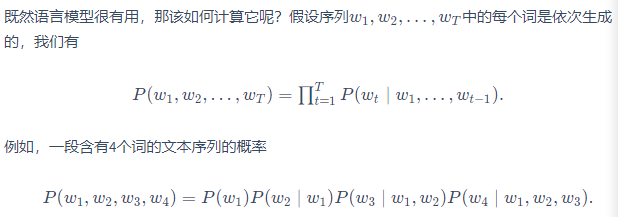
为了计算语言模型，我们需要计算词的概率，以及一个词在给定前几个词的情况下的条件概率，即**语言模型参数**。设训练数据集为一个大型文本语料库，如维基百科的所有条目。词的概率可以通过该词在训练数据集中的相对词频来计算。例如,$P(w_1)$可以计算维 $w_1$在训练在训练数据集中的**词频（词出现的次数）与训练数据集的总词数之比**。因此，根据条件概率定义，一个词在给定前几个词的情况下的条件概率也可以通过训练数据集中的相对词频计算。例如，$P(w_2|w_1)$可以计算为$w_1,w_2$两词相邻的频率和$w_1$词频的比值，因为该比值即$P(w_1,w_2)$与$P(w_1)$之比；而 $P(w_3|w_1,w_2)$同理可以计算为$w_1、w_2$与$w_3$三词相邻的频率与$w_1$和$w_2$两词相邻的频率的比值。

## n元语法

当序列长度增加时，计算和存储多个词共同出现的概率的复杂度会呈指数级增加。n元语法通过马尔可夫假设（虽然并不一定成立）简化了语言模型的计算。<span class="burk">这里的马尔可夫假设是指一个词的出现只与前面n个词相关</span>，即n阶马尔可夫链（Markov chain of order n）。如果 $n=1$,那么有 $P(w_3|w_1,w_2) = P(w_3|w_2)$.如果基于 n-1阶马尔可夫链，我们可以将语言模型改写为
$$
P(w_1,w_2,...,w_T) = \prod ^T_{t=1} P(w_t | w_{t-(n-1)},...,w_{t-1}
$$

以上也叫n元语法。它是基于n−1阶马尔可夫链的概率语言模型。当nn分别为1、2和3时，我们将其分别称作一元语法（unigram）、二元语法（bigram）和三元语法（trigram）。

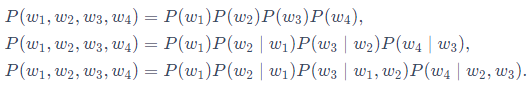

# 循环神经网络

增大n，模型参数的数量将随之呈现指数级增长。
本节将介绍循环神经网络，它并非刚性地记忆所有固定长度的序列，而是**通过隐藏状态来存储之前时间步的信息**，首先我们回忆一下前面介绍过的多层感知机，然后描述如何添加隐藏状态来将它变成循环神经网络。

## 不含隐藏状态的神经网络

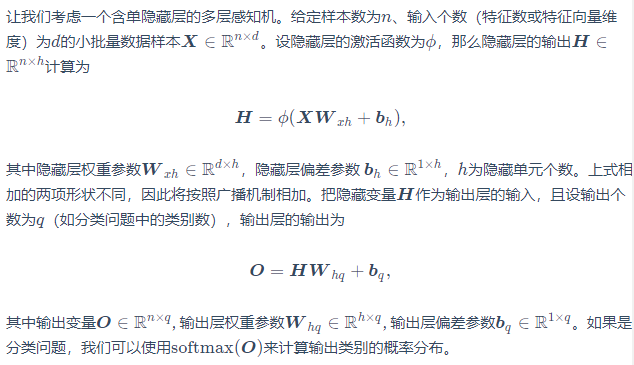

## 含隐藏状态的循环神经网络

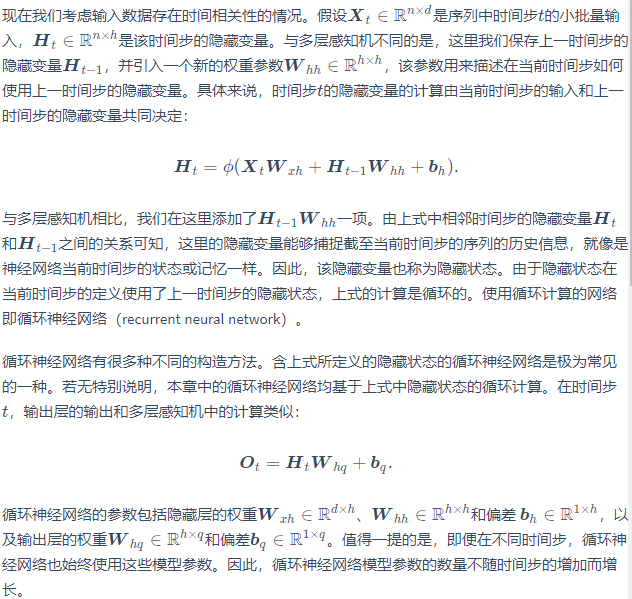


图6.1展示了循环神经网络在3个相邻时间步的计算逻辑。在时间步t，隐藏层的计算可以看成是将输入$X_t$和前一时间步隐藏状态 $H_{t-1}$连结后输入一个激活函数为$\phi$全连接层。该全连接层的输出就是当前时间步的隐藏状态$H_t$,且模型参数为$W_{xh}$与$W_{hh}$的连结，偏差为 $b_h$.当前时间步t的隐藏状态$H_t$将参与下一个时间$t+1$的隐藏状态$H_{t+1}$的计算，并输入到当前时间步的全连接输出层。
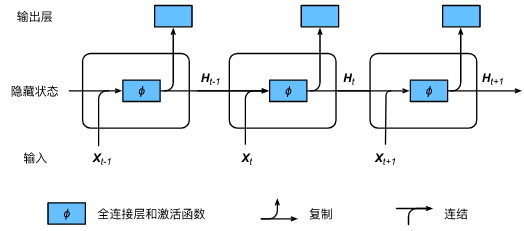


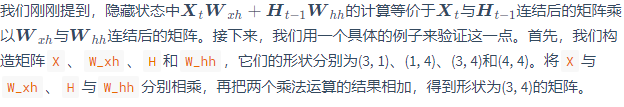

In [1]:
import torch

X,W_xh = torch.randn(3,1),torch.randn(1,4)
H,W_hh = torch.randn(3,4),torch.randn(4,4)
torch.matmul(X,W_xh) + torch.matmul(H,W_hh)

tensor([[-0.7504, -0.1601,  0.5086, -0.4960],
        [-0.4960, -0.9880,  0.7561,  0.0217],
        [ 0.7041,  1.7965, -1.1305, -0.7489]])

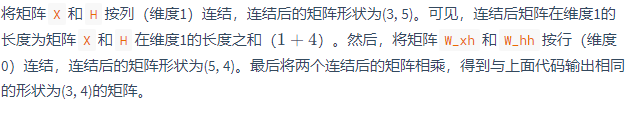



In [2]:
torch.matmul(torch.cat((X,H),dim=1),torch.cat((W_xh,W_hh),dim=0))

tensor([[-0.7504, -0.1601,  0.5086, -0.4960],
        [-0.4960, -0.9880,  0.7561,  0.0217],
        [ 0.7041,  1.7965, -1.1305, -0.7489]])

## 应用：基于字符级循环神经网络的语言模型

最后我们介绍如何应用循环神经网络来构建一个语言模型。设小批量中样本数为1，文本序列为“想”“要”“有”“直”“升”“机”。图6.2演示了如何使用循环神经网络**基于当前和过去的字符来预测下一个字符**。。在训练时，我们对每个时间步的输出层输出使用softmax运算，然后使用交叉熵损失函数来计算它与标签的误差。在图6.2中，由于隐藏层中隐藏状态的循环计算，时间步3的输出$O_3$取决于文本序列“想”“要”“有”。 由于训练数据中该序列的下一个词为“直”，时间步3的损失将取决于该时间步基于序列“想”“要”“有”生成下一个词的概率分布与该时间步的标签“直”。
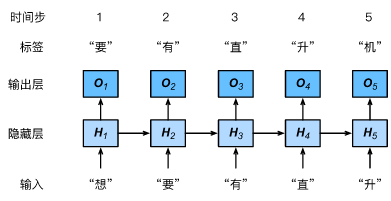
因为每个输入词是一个字符，因此这个模型被称为字符级循环神经网络（character-level recurrent neural network）。因为不同字符的个数远小于不同词的个数（对于英文尤其如此），所以字符级循环神经网络的计算通常更加简单。在接下来的几节里，我们将介绍它的具体实现。

In [3]:
import torch
import random
import zipfile

with zipfile.ZipFile('./jaychou_lyrics.txt.zip') as zin:
    with zin.open('jaychou_lyrics.txt') as f:
        corpus_chars = f.read().decode('utf-8')
    print(corpus_chars[:48])

想要有直升机
想要和你飞到宇宙去
想要和你融化在一起
融化在宇宙里
我每天每天每天在想想想想著你


这个数据集有6万多个字符。为了打印方便，我们把换行符替换成空格，然后仅使用前1万个字符来训练模型。

In [4]:
corpus_chars = corpus_chars.replace('\n',' ').replace('\r',' ')
corpus_chars = corpus_chars[0:10000]

## 建立字符索引

我们将每个字符映射成一个从0开始的连续整数，又称索引，来方便之后的数据处理。为了得到索引，我们将数据集里所有不同字符取出来，然后将其逐一映射到索引来构造词典。接着，打印vocab_size，即词典中不同字符的个数，又称词典大小。

In [5]:
idx_to_char = list(set(corpus_chars))
char_to_idx = dict([(char,i) for i ,char in enumerate(idx_to_char)])
vocab_size = len(char_to_idx)
vocab_size


1027

之后，将训练数据集中每个字符转换为索引，并打印前20个字符及其对应的索引

In [6]:
corpus_indices = [char_to_idx[char] for char in corpus_chars]
sample = corpus_indices[:20]
print('chars:', ''.join([idx_to_char[idx] for idx in sample]))
print('indices:', sample)


chars: 想要有直升机 想要和你飞到宇宙去 想要和
indices: [219, 797, 104, 673, 38, 230, 947, 219, 797, 762, 335, 485, 366, 703, 482, 639, 947, 219, 797, 762]


In [24]:
def load_data_jay_lyrics():
    """加载周杰伦歌词的数据集"""
    with zipfile.ZipFile('./jaychou_lyrics.txt.zip') as zin:
        with zin.open('jaychou_lyrics.txt') as f:
            corpus_chars = f.read().decode('utf-8')
    corpus_chars = corpus_chars.replace('\n', ' ').replace('\r', ' ')
    corpus_chars = corpus_chars[0:10000]
    idx_to_char = list(set(corpus_chars))
    char_to_idx = dict([(char, i) for i, char in enumerate(idx_to_char)])
    vocab_size = len(char_to_idx)
    corpus_indices = [char_to_idx[char] for char in corpus_chars]
    return corpus_indices, char_to_idx, idx_to_char, vocab_size

## 时序数据的采样

在训练中我们需要每次随机读取小批量样本和标签。与之前章节的实验数据不同的是，时序数据的一个样本通常包含连续的字符。假设时间步数为5，样本序列为5个字符，即“想”“要”“有”“直”“升”。该样本的标签序列为这些字符分别在训练集中的下一个字符，即“要”“有”“直”“升”“机”。我们有两种方式对时序数据进行采样，分别是**随机采样和相邻采样**。

### 随机采样

下面的代码每次从数据里随机采样一个小批量。其中批量大小<span class="mark">batch_size</span>指每个小批量的样本数，<span class="mark">num_steps</span>为每个样本所包含的时间步数。 在随机采样中，每个样本是原始序列上任意截取的一段序列。相邻的两个随机小批量在原始序列上的位置不一定相毗邻。因此，我们无法用一个小批量最终时间步的隐藏状态来初始化下一个小批量的隐藏状态。在训练模型时，每次随机采样前都需要重新初始化隐藏状态。

In [27]:
# 本函数已保存在d2lzh_pytorch包中方便以后使用
def data_iter_random(corpus_indices, batch_size, num_steps, device=None):
    # 减1是因为输出的索引x是相应输入的索引y加1
    num_examples = (len(corpus_indices) - 1) // num_steps
    epoch_size = num_examples // batch_size
    example_indices = list(range(num_examples))
    random.shuffle(example_indices)
    print('num_examples: ',num_examples,
         'epoch_size: ',epoch_size,
         'example_indices: ',example_indices,
         )
    

    # 返回从pos开始的长为num_steps的序列
    def _data(pos):
        return corpus_indices[pos: pos + num_steps]
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    for i in range(epoch_size):
        # 每次读取batch_size个随机样本
        i = i * batch_size
        batch_indices = example_indices[i: i + batch_size]
        print('batch_indices: ',batch_indices)
        X = [_data(j * num_steps) for j in batch_indices]
        Y = [_data(j * num_steps + 1) for j in batch_indices]
        yield torch.tensor(X, dtype=torch.float32, device=device), torch.tensor(Y, dtype=torch.float32, device=device)


让我们输入一个从0到29的连续整数的人工序列。设批量大小和时间步数分别为2和6。打印随机采样每次读取的小批量样本的输入X和标签Y。可见，相邻的两个随机小批量在原始序列上的位置不一定相毗邻。

In [9]:
my_seq = list(range(30))
for X, Y in data_iter_random(my_seq, batch_size=2, num_steps=6):
    print('X: ', X, '\nY:', Y, '\n')


num_examples:  4 epoch_size:  2 example_indices:  [3, 2, 1, 0]
batch_indices:  [3, 2]
X:  tensor([[18., 19., 20., 21., 22., 23.],
        [12., 13., 14., 15., 16., 17.]], device='cuda:0') 
Y: tensor([[19., 20., 21., 22., 23., 24.],
        [13., 14., 15., 16., 17., 18.]], device='cuda:0') 

batch_indices:  [1, 0]
X:  tensor([[ 6.,  7.,  8.,  9., 10., 11.],
        [ 0.,  1.,  2.,  3.,  4.,  5.]], device='cuda:0') 
Y: tensor([[ 7.,  8.,  9., 10., 11., 12.],
        [ 1.,  2.,  3.,  4.,  5.,  6.]], device='cuda:0') 



### 相邻采样

除对原始序列做随机采样之外，我们还可以令相邻的两个随机小批量在原始序列上的位置相毗邻。这时候，我们就可以用一个小批量最终时间步的隐藏状态来初始化下一个小批量的隐藏状态，从而使下一个小批量的输出也取决于当前小批量的输入，并如此循环下去。这对实现循环神经网络造成了两方面影响：一方面， 在训练模型时，我们只需在每一个迭代周期开始时初始化隐藏状态；另一方面，当多个相邻小批量通过传递隐藏状态串联起来时，模型参数的梯度计算将依赖所有串联起来的小批量序列。同一迭代周期中，随着迭代次数的增加，梯度的计算开销会越来越大。 为了使模型参数的梯度计算只依赖一次迭代读取的小批量序列，我们可以在每次读取小批量前将隐藏状态从计算图中分离出来。我们将在下一节（循环神经网络的从零开始实现）的实现中了解这种处理方式。

In [10]:
# 本函数已保存在d2lzh_pytorch包中方便以后使用
def data_iter_consecutive(corpus_indices, batch_size, num_steps, device=None):
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    corpus_indices = torch.tensor(corpus_indices, dtype=torch.float32, device=device)
    data_len = len(corpus_indices)
    batch_len = data_len // batch_size
    indices = corpus_indices[0: batch_size*batch_len].view(batch_size, batch_len)
    epoch_size = (batch_len - 1) // num_steps
    for i in range(epoch_size):
        i = i * num_steps
        X = indices[:, i: i + num_steps]
        Y = indices[:, i + 1: i + num_steps + 1]
        yield X, Y


同样的设置下，打印相邻采样每次读取的小批量样本的输入X和标签Y。相邻的两个随机小批量在原始序列上的位置相毗邻。

In [11]:
for X, Y in data_iter_consecutive(my_seq, batch_size=2, num_steps=6):
    print('X: ', X, '\nY:', Y, '\n')


X:  tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [15., 16., 17., 18., 19., 20.]], device='cuda:0') 
Y: tensor([[ 1.,  2.,  3.,  4.,  5.,  6.],
        [16., 17., 18., 19., 20., 21.]], device='cuda:0') 

X:  tensor([[ 6.,  7.,  8.,  9., 10., 11.],
        [21., 22., 23., 24., 25., 26.]], device='cuda:0') 
Y: tensor([[ 7.,  8.,  9., 10., 11., 12.],
        [22., 23., 24., 25., 26., 27.]], device='cuda:0') 



## 循环神经网络的从零开始

在本节中，我们将从零开始实现一个基于<span class="burk">字符级循环神经网络</span>的语言模型，并在周杰伦专辑歌词数据集上训练一个模型来进行歌词创作。首先，我们读取周杰伦专辑歌词数据集：

In [13]:
import time
import math
import numpy as np
import torch
from torch import nn,optim
import torch.nn.functional as F
import sys
]sys.path.append('./pytorch')
# import d2lzh_pytorch as d2l
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
(corpus_indices, char_to_idx, idx_to_char, vocab_size) = load_data_jay_lyrics()


NameError: name 'load_data_jay_lyrics' is not defined

### one-hot向量

为了将词表示成向量输入到神经网络，一个简单的办法是使用one-hot向量，假设词典中不同字符的数量为N（即词典大小 vocab_size）,每个字符已经同一个从0到N-1的连续整数值索引一一对应。如果一个字符的索引是整数i，那么我们我们创建一个全0的长为N的向量，并将其位置为ii的元素设成1。该向量就是对原字符的one-hot向量。下面分别展示了索引为0和2的one-hot向量，向量长度等于词典大小。

In [13]:
import torch
vocab_size = 10
def one_hot(x,n_class,dtype=torch.float32):
    # X shape:(batch),output shape:(batch,n_class)
    x = x.long()
    res = torch.zeros(x.shape[0],n_class,dtype=dtype,device = x.device)
    res.scatter_(1,x.view(-1,1),1)
    return res

x = torch.tensor([0,2])
one_hot(x,vocab_size)
    

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

我们每次采样的小批量的形状是(批量大小, 时间步数)。下面的函数将这样的小批量变换成数个可以输入进网络的形状为(批量大小, 词典大小)的矩阵，矩阵个数等于时间步数。

In [14]:
# 本函数已保存在d2lzh_pytorch包中方便以后使用
def to_onehot(X, n_class):  
    # X shape: (batch, seq_len), output: seq_len elements of (batch, n_class)
    return [one_hot(X[:, i], n_class) for i in range(X.shape[1])]

X = torch.arange(10).view(2, 5)
print(X)
inputs = to_onehot(X, vocab_size)
print(len(inputs), inputs[0].shape)
print(inputs)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
5 torch.Size([2, 10])
[tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]]), tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]]), tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]]), tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]]), tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])]


### 初始化模型参数

接下来，我们初始化模型参数，隐藏单元个数 num_hiddens 是一个超参数。

In [15]:
num_inputs, num_hiddens, num_outputs = vocab_size, 256, vocab_size
print('will use', device)

def get_params():
    def _one(shape):
        ts = torch.tensor(np.random.normal(0,0.01,size=shape),device=device, dtype=torch.float32)
        return torch.nn.Parameter(ts, requires_grad=True)
        
    # 隐藏层参数
    W_xh = _one((num_inputs, num_hiddens))
    W_hh = _one((num_hiddens, num_hiddens))
    b_h = torch.nn.Parameter(torch.zeros(num_hiddens, device=device, requires_grad=True))
    # 输出层参数
    W_hq = _one((num_hiddens, num_outputs))
    b_q = torch.nn.Parameter(torch.zeros(num_outputs, device=device, requires_grad=True))
    return nn.ParameterList([W_xh, W_hh, b_h, W_hq, b_q])

will use cuda


### 定义模型

我们根据循环神经网络的计算表达式实现该模型。首先定义init_rnn_state函数来返回初始化的隐藏状态。它返回由一个形状为(批量大小, 隐藏单元个数)的值为0的NDArray组成的元组。使用元组是为了更便于处理隐藏状态含有多个NDArray的情况。

In [16]:
def init_rnn_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device=device), )


下面的rnn函数定义了在一个时间步里如何计算隐藏状态和输出。这里的激活函数使用了tanh函数。3.8节（多层感知机）中介绍过，当元素在实数域上均匀分布时，tanh函数值的均值为0

In [17]:
def rnn(inputs, state, params):
    # inputs和outputs皆为num_steps个形状为(batch_size, vocab_size)的矩阵
    W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    for X in inputs:
        H = torch.tanh(torch.matmul(X, W_xh) + torch.matmul(H, W_hh) + b_h)
        Y = torch.matmul(H, W_hq) + b_q
        outputs.append(Y)
    return outputs, (H,)


做个简单的测试来观察输出结果的个数(时间步数),以及第一个时间步的输出层输出的形状和隐藏状态的形状。

In [19]:
state = init_rnn_state(X.shape[0], num_hiddens, device)
inputs = to_onehot(X.to(device), vocab_size)
params = get_params()
outputs, state_new = rnn(inputs, state, params)
print(len(outputs), outputs[0].shape, state_new[0].shape) 




5 torch.Size([2, 10]) torch.Size([2, 256])


###  定义预测函数

以下函数基于前缀 prefix(含有数个字符的字符串)来预测接下来的 num_chars 个字符，这个函数稍显复杂，其中我们将循环神经单元rnn设置成函数参数。这样在后面小节介绍其他循环神经网络时能重复使用这个函数

In [20]:
# 本函数已保存在d2lzh_pytorch包中方便以后使用
def predict_rnn(prefix, num_chars, rnn, params, init_rnn_state,
                num_hiddens, vocab_size, device, idx_to_char, char_to_idx):
    state = init_rnn_state(1, num_hiddens, device)
    output = [char_to_idx[prefix[0]]]
    for t in range(num_chars + len(prefix) - 1):
        # 将上一时间步的输出作为当前时间步的输入
        X = to_onehot(torch.tensor([[output[-1]]], device=device), vocab_size)
        # 计算输出和更新隐藏状态
        (Y, state) = rnn(X, state, params)
        # 下一个时间步的输入是prefix里的字符或者当前的最佳预测字符
        if t < len(prefix) - 1:
            output.append(char_to_idx[prefix[t + 1]])
        else:
            output.append(int(Y[0].argmax(dim=1).item()))
    return ''.join([idx_to_char[i] for i in output])   


In [26]:
predict_rnn('分开', 10, rnn, params, init_rnn_state, num_hiddens, vocab_size,
            device, idx_to_char, char_to_idx)


NameError: name 'idx_to_char' is not defined

### 裁剪梯度

    循环神经网络中较容易出现梯度衰减或梯度爆炸。我们会在6.6节（通过时间反向传播）中解释原因。为了应对梯度爆炸，我们可以裁剪梯度（clip gradient）。假设我们把所有模型参数梯度的元素拼接成一个向量 gg，并设裁剪的阈值是θθ。裁剪后的梯度的L2范数不超过.


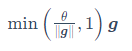

In [29]:
# 本函数已保存在d2lzh_pytorch包中方便以后使用
def grad_clipping(params, theta, device):
    norm = torch.tensor([0.0], device=device)
    for param in params:
        norm += (param.grad.data ** 2).sum()
    norm = norm.sqrt().item()
    if norm > theta:
        for param in params:
            param.grad.data *= (theta / norm)


### 定义模型训练函数

和之前章节的模型训练函数相比，这里的模型函数有以下几点不同：
1. 使用困惑度评价模型。
2. 在迭代模型参数前裁剪梯度。
3. 对时序数据采用不同采样方法将导致隐藏状态初始化的不同。相关讨论可参考6.3节（语言模型数据集（周杰伦专辑歌词））。

In [1]:
# 本函数已保存在d2lzh_pytorch包中方便以后使用
def train_and_predict_rnn(rnn, get_params, init_rnn_state, num_hiddens,
                          vocab_size, device, corpus_indices, idx_to_char,
                          char_to_idx, is_random_iter, num_epochs, num_steps,
                          lr, clipping_theta, batch_size, pred_period,
                          pred_len, prefixes):
    if is_random_iter:
        data_iter_fn = d2l.data_iter_random
    else:
        data_iter_fn = d2l.data_iter_consecutive
    params = get_params()
    loss = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        if not is_random_iter:  # 如使用相邻采样，在epoch开始时初始化隐藏状态
            state = init_rnn_state(batch_size, num_hiddens, device)
        l_sum, n, start = 0.0, 0, time.time()
        data_iter = data_iter_fn(corpus_indices, batch_size, num_steps, device)
        for X, Y in data_iter:
            if is_random_iter:  # 如使用随机采样，在每个小批量更新前初始化隐藏状态
                state = init_rnn_state(batch_size, num_hiddens, device)
            else:  
            # 否则需要使用detach函数从计算图分离隐藏状态, 这是为了
            # 使模型参数的梯度计算只依赖一次迭代读取的小批量序列(防止梯度计算开销太大)
                for s in state:
                    s.detach_()

            inputs = to_onehot(X, vocab_size)
            # outputs有num_steps个形状为(batch_size, vocab_size)的矩阵
            (outputs, state) = rnn(inputs, state, params)
            # 拼接之后形状为(num_steps * batch_size, vocab_size)
            outputs = torch.cat(outputs, dim=0)
            # Y的形状是(batch_size, num_steps)，转置后再变成长度为
            # batch * num_steps 的向量，这样跟输出的行一一对应
            y = torch.transpose(Y, 0, 1).contiguous().view(-1)
            # 使用交叉熵损失计算平均分类误差
            l = loss(outputs, y.long())

            # 梯度清0
            if params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            l.backward()
            grad_clipping(params, clipping_theta, device)  # 裁剪梯度
            d2l.sgd(params, lr, 1)  # 因为误差已经取过均值，梯度不用再做平均
            l_sum += l.item() * y.shape[0]
            n += y.shape[0]

        if (epoch + 1) % pred_period == 0:
            print('epoch %d, perplexity %f, time %.2f sec' % (
                epoch + 1, math.exp(l_sum / n), time.time() - start))
            for prefix in prefixes:
                print(' -', predict_rnn(prefix, pred_len, rnn, params, init_rnn_state,
                    num_hiddens, vocab_size, device, idx_to_char, char_to_idx))



## 循环神经网络的简洁实现

本节将使用Pytorch来更简洁地实现基于循环神经网络的语言模型。首先，我们将读取周杰伦专辑歌词数据集

In [2]:
import time
import math
import numpy as np
import torch
from torch import nn,optim
import torch.nn.functional as F
import sys
# print(sys.path)
sys.path.append('./pytorch')


import d2lzh_pytorch as d2l
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

(corpus_indices, char_to_idx, idx_to_char, vocab_size) = d2l.load_data_jay_lyrics()



### 定义模型

PyTorch中的nn模块提供了循环神经网络的实现。下面构造一个含单隐含层、隐藏单元个数为256的循环神经网络层<span class="burk">rnn_layer</span>

In [21]:
num_hiddens = 256
# rnn_layer = nn.LSTM(input_size = vocab_size,hidden_size=num_hidden)
# print(rnn_layer)
rnn_layer = nn.RNN(input_size=vocab_size,hidden_size=num_hidden)
print(rnn_layer)



RNN(1027, 256)


与上一节中实现的循环神经网络不同，这里<span class="burk">rnn_layer</span>的输入形状为(时间步数，批量大小，输入个数)，其中的输入个数即one-hot的向量长度(词典大小)。此外，rnn_layer作为nn.RNN的实例，在前向计算后会分别返回输出和隐藏状态h，其中输出指的是隐藏层在 **各个时间步** 上计算并输出的隐藏状态，它们通常作为后续输出层的输入。需要强调的是，该“输出”本身并不涉及输出层计算，形状为(时间步数，批量大小，隐藏单元个数)。而 nn.RNN 实例在前向计算返回的隐藏状态指的是隐藏层在最后时间步的隐藏状态；当隐藏层有多层时，每一层的隐藏状态都会记录在该变量中；对于像长短期记忆(LSTM)，隐藏状态是一个元组(h,c),即 hidden state和 cell state.我们会在后面介绍长短期记忆和深度循环神经网络。关于循环神经网络(以LSTM为例)的输出，我们可以参考下图

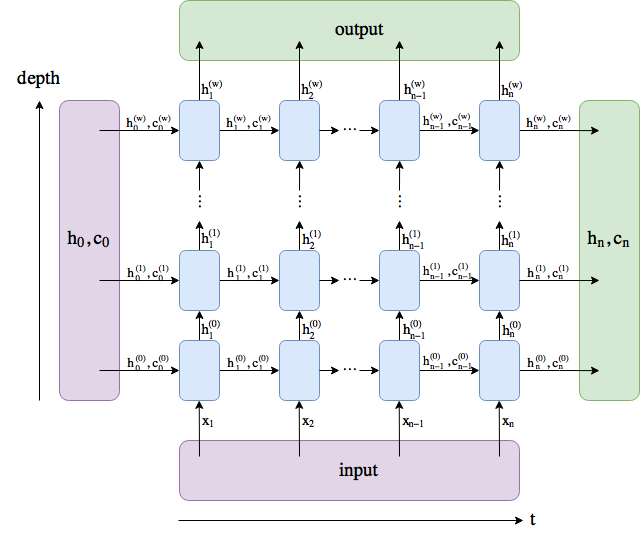

来看看我们的例子，输出形状为(时间步数，批量大小，隐藏单元个数)，隐藏状态h的形状为(层数，批量大小，隐藏单元个数)

In [4]:
num_steps = 35
batch_size = 2
state = None
print('vocab_size: ',vocab_size)
X = torch.randn(num_steps,batch_size,vocab_size)
Y,state_new = rnn_layer(X,state)
print("Y.shape: ", Y.shape,len(state_new),) # 时间步数, 批量大小, 隐藏单元个数)
print(state_new.shape) # 层数，批量大小，隐藏单元个数
print(state_new[00].shape)




vocab_size:  1027
Y.shape:  torch.Size([35, 2, 256]) 1
torch.Size([1, 2, 256])
torch.Size([2, 256])


如果<span class="burk">rnn_layer</span>是 <span class="burk">nn.LSTM</span> 的实例，那么上面的输出是什么？

接下来我们继承 Module 类来定义一个完整的循环神经网络。它首先将输入数据使用 one-hot向量表示后输入到 rnn_layer中，然后使用全连接层得到输出。输出个数等于词典大小 vocab_size.

In [5]:
# 本类已保存在d2lzh_pytorch包中方便以后使用
class RNNModel(nn.Module):
    def __init__(self, rnn_layer, vocab_size):
        super(RNNModel, self).__init__()
        self.rnn = rnn_layer
        self.hidden_size = rnn_layer.hidden_size * (2 if rnn_layer.bidirectional else 1) 
        self.vocab_size = vocab_size
        self.dense = nn.Linear(self.hidden_size, vocab_size)
        self.state = None

    def forward(self, inputs, state): # inputs: (batch, seq_len)
        # 获取one-hot向量表示
        X = d2l.to_onehot(inputs, self.vocab_size) # X是个list
        Y, self.state = self.rnn(torch.stack(X), state)
        # 全连接层会首先将Y的形状变成(num_steps * batch_size, num_hiddens)，它的输出
        # 形状为(num_steps * batch_size, vocab_size)
        output = self.dense(Y.view(-1, Y.shape[-1]))
        return output, self.state


### 训练模型

In [7]:
# 本函数已保存在d2lzh_pytorch包中方便以后使用
def predict_rnn_pytorch(prefix, num_chars, model, vocab_size, device, idx_to_char,
                      char_to_idx):
    state = None
    output = [char_to_idx[prefix[0]]] # output会记录prefix加上输出
    for t in range(num_chars + len(prefix) - 1):
        X = torch.tensor([output[-1]], device=device).view(1, 1)
        if state is not None:
            if isinstance(state, tuple): # LSTM, state:(h, c)  
                state = (state[0].to(device), state[1].to(device))
            else:   
                state = state.to(device)

        (Y, state) = model(X, state)
        if t < len(prefix) - 1:
            output.append(char_to_idx[prefix[t + 1]])
        else:
            output.append(int(Y.argmax(dim=1).item()))
    return ''.join([idx_to_char[i] for i in output])


In [18]:
model = RNNModel(rnn_layer, vocab_size).to(device)
predict_rnn_pytorch('分开', 10, model, vocab_size, device, idx_to_char, char_to_idx)


'分开仔奔猜蛛奔野力逅管符'

接下来实现训练函数。算法同上一节的一样，但这里只使用了相邻采样来读取数据

In [19]:
# 本函数已保存在d2lzh_pytorch包中方便以后使用
def train_and_predict_rnn_pytorch(model, num_hiddens, vocab_size, device,
                                corpus_indices, idx_to_char, char_to_idx,
                                num_epochs, num_steps, lr, clipping_theta,
                                batch_size, pred_period, pred_len, prefixes):
    loss = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    model.to(device)
    state = None
    for epoch in range(num_epochs):
        l_sum, n, start = 0.0, 0, time.time()
        data_iter = d2l.data_iter_consecutive(corpus_indices, batch_size, num_steps, device) # 相邻采样
        for X, Y in data_iter:
            if state is not None:
                # 使用detach函数从计算图分离隐藏状态, 这是为了
                # 使模型参数的梯度计算只依赖一次迭代读取的小批量序列(防止梯度计算开销太大)
                if isinstance (state, tuple): # LSTM, state:(h, c)  
                    state = (state[0].detach(), state[1].detach())
                else:   
                    state = state.detach()

            (output, state) = model(X, state) # output: 形状为(num_steps * batch_size, vocab_size)

            # Y的形状是(batch_size, num_steps)，转置后再变成长度为
            # batch * num_steps 的向量，这样跟输出的行一一对应
            y = torch.transpose(Y, 0, 1).contiguous().view(-1)
            l = loss(output, y.long())

            optimizer.zero_grad()
            l.backward()
            # 梯度裁剪
            d2l.grad_clipping(model.parameters(), clipping_theta, device)
            optimizer.step()
            l_sum += l.item() * y.shape[0]
            n += y.shape[0]

        try:
            perplexity = math.exp(l_sum / n)
        except OverflowError:
            perplexity = float('inf')
        if (epoch + 1) % pred_period == 0:
            print('epoch %d, perplexity %f, time %.2f sec' % (
                epoch + 1, perplexity, time.time() - start))
            for prefix in prefixes:
                print(' -', predict_rnn_pytorch(
                    prefix, pred_len, model, vocab_size, device, idx_to_char,
                    char_to_idx))


In [22]:
num_epochs, batch_size, lr, clipping_theta = 250, 32, 1e-3, 1e-2 # 注意这里的学习率设置
pred_period, pred_len, prefixes = 50, 50, ['分开', '不分开']
train_and_predict_rnn_pytorch(model, num_hiddens, vocab_size, device,
                            corpus_indices, idx_to_char, char_to_idx,
                            num_epochs, num_steps, lr, clipping_theta,
                            batch_size, pred_period, pred_len, prefixes)


epoch 50, perplexity 7.392263, time 0.16 sec
 - 分开始我面 这样 我不多 不  不要再想 我不多 想 我不要再想 我不多 不  不要再想 我不多 不  
 - 不分开 我不能再想 我不 再想 我不要再想 我不多 不  不要再想 我不 我不 我不多 不  不要再想 我
epoch 100, perplexity 1.230401, time 0.15 sec
 - 分开 我不能看着球 一定一个人 默 心我在这样的甜蜜  我过再爸 你不能再想常你说 我想想这样的我妈妈妈
 - 不分开 我不能再痛  不知不觉 我不了这里很久但那个 你说在 我 我怕眼睛 不人的家  所有回忆对着我进攻
epoch 150, perplexity 1.060671, time 0.15 sec
 - 分开 我不能看着球 一定一口吃掉忧  一壶好酒 再来一碗热粥 配上几斤的牛肉 我说店小二 三两银够不够 
 - 不分开  我有了痛  再感动 可爱女人 如果说怀疑 可以造句如果说分离 能够翻译 如果这一切 真的可以 我
epoch 200, perplexity 1.037449, time 0.16 sec
 - 分开 我不想的你 我不想太想 我想你这样 我妈的你爱女人 漂亮的让我面红的可爱女人 温柔的让我心疼的可爱
 - 不分开  一场悲剧 我一定带生 在我的模样 她 在这样打我妈妈 难过去吃 透 说散说你想很久了吧? 我不要
epoch 250, perplexity 1.020242, time 0.16 sec
 - 分开 我不想的痛 我不想太多 我要 看着我 抛物线进球我单手牵人开球 我有回忆不的忧像 我习惯看你以 所
 - 不分开 能一场悲剧 我来像这生活 我过去 我不想 我想 你不能再想要你不知 我 想想你你 经过开  不知不


## 通过时间反向传播

在前面个两节中，如果不裁剪梯度，莫i选哪个将无法正常训练。为了深刻理解这一现象，本节将介绍循环神经网络中梯度计算和存储方法，即通过时间反向传播(back-propagation through time)

我们在3.14节（正向传播、反向传播和计算图）中介绍了神经网络中梯度计算与存储的一般思路，并强调正向传播和反向传播相互依赖。正向传播在循环神经网络中比较直观，而通过时间反向传播其实是反向传播在循环神经网络中的具体应用。**我们需要将循环神经网络按时间步展开，从而得到模型变量和参数之间的依赖关系，并依据链式法则应用反向传播计算并存储梯度。**

### 定义模型

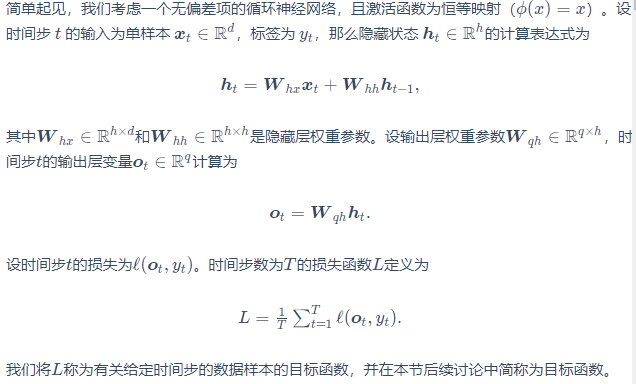

### 模型计算图

为了可视化循环神经网络中模型变量和参数在计算中的依赖关系，我们可以绘制模型计算图，时间步3的隐藏状态h3的计算依赖参数 $W_{hx},w_{hh}$,上一时间步隐藏状态$h_2$以及当前时间步输入$x_3$

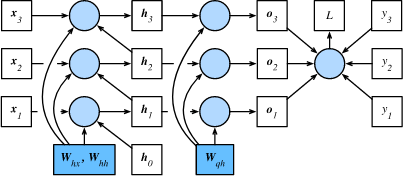

图6.3 时间步数为3的循环神经网络模型计算中的依赖关系。方框代表变量(无阴影)或参数(有阴影)，圆圈代表运算符

### 方法

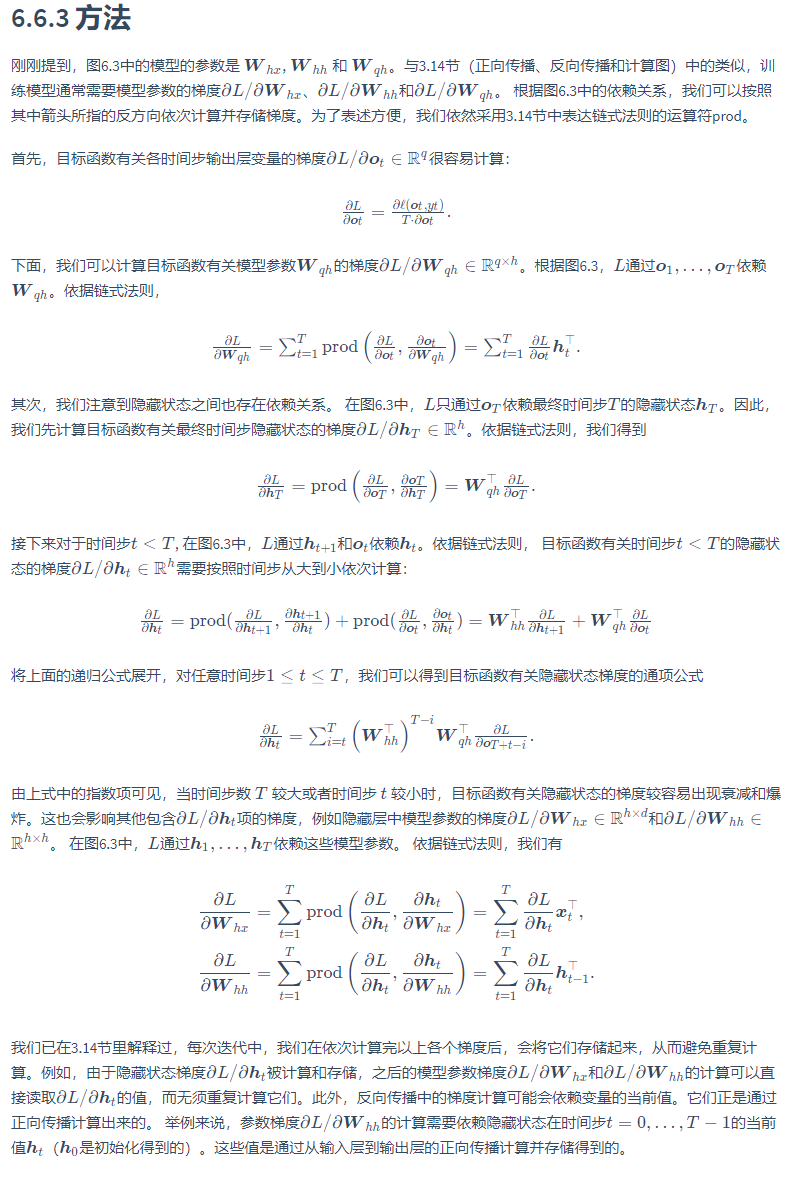

**小结**
* 通过时间反向传播是反向传播在循环神经网络中的具体应用
* 当总的时间步数较大或者当时间步较小时，循环神经网络的梯度容易出现衰减或爆炸



## 门控循环单元(GRU)

上一节介绍了循环神经网络中的梯度计算方法。我们发现，当时间步数较大或者时间步较小时，循环神经网络的梯度容易出现衰减或爆炸。虽然裁剪梯度可以应对梯度爆炸，但是无法解决衰减的问题。通常由于这个原因，循环神经网络在实际中较难捕捉时间序列中时间步距离较大的依赖关系。

门控循环神经网络（gated recurrent nerual network ）的提出，正是为了更好地捕捉时间序列中时间步距离较大的依赖关系。它可以用过学习的门来控制信息的流动，其中，门控循环单元(gated recurrent unit,GRU)是一种常用的门控循环神经网络。另一种常用的门控循环神经网络将在下一节中介绍

### 门控循环单元

下面将介绍门控循环单元的设计。它引入了重置门(reset gate)和更新门（update gate ）的概念，从而修改了循环神经网络中隐藏状态的计算方式。


#### 重置门和更新门


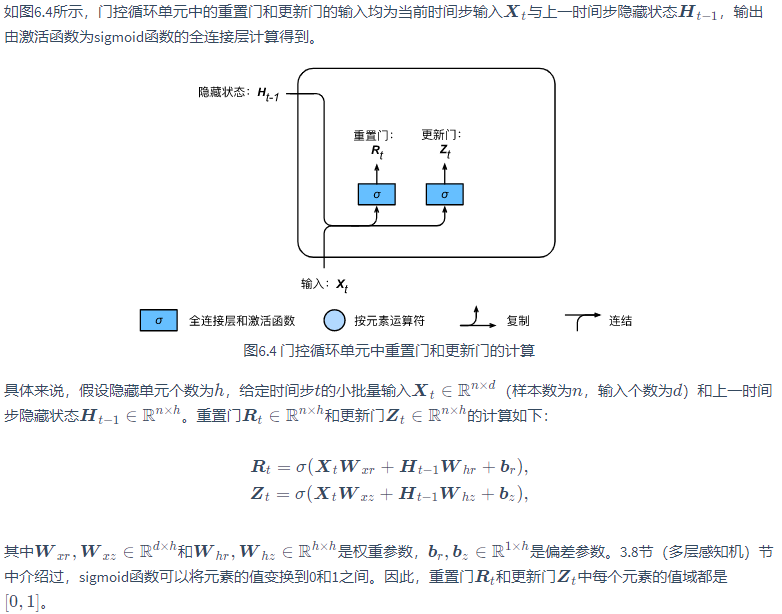

#### 候选隐藏状态

接下来，门控循环单元将计算候选隐藏状态来辅助稍后的隐藏状态计算。如图6.5所示，我们将当前时间步重置门的输出与上一时间步隐藏状态做按元素乘法。如果重置门中元素接近0，那么意味着重置对应隐藏状态元素为0，即丢弃上一时间步的隐藏状态。如果元素值接近1，那么表示保留上衣时间步的隐藏状态。然后，将按元素乘法的结果与当前时间步的输入连结，再通过激活函数tanh的全连接层计算出候选隐藏状态，其所有元素的值域为 [-1,1]

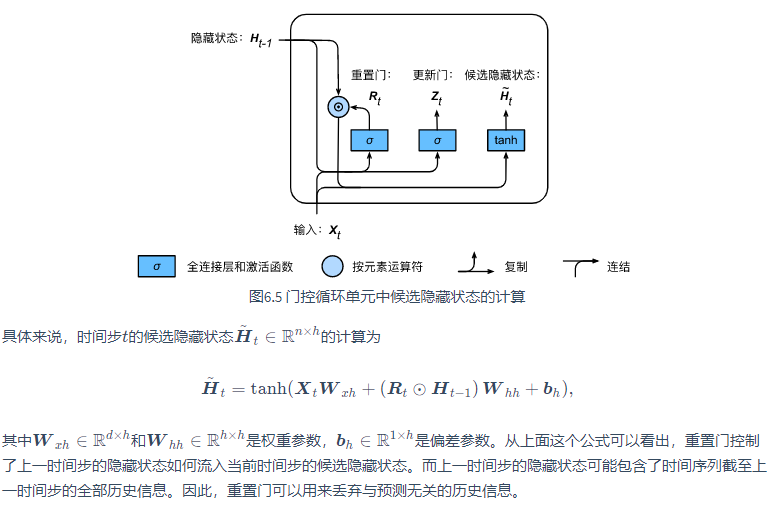

#### 隐藏状态

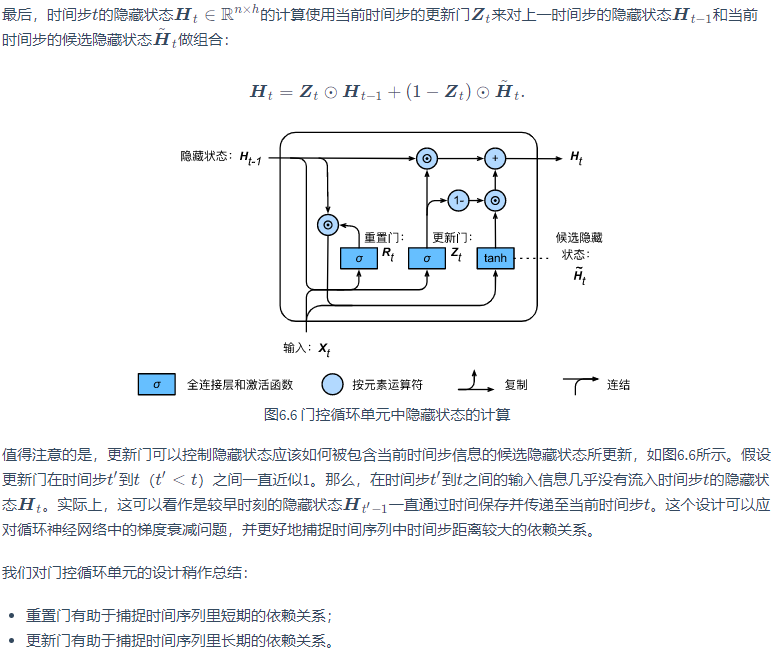

#### 读取数据集

为了实现并展示门控循环单元，下面依然使用周杰伦歌词数据集来训练模型作词。这里除了门控循环单元以外的实现已在6.22节中(循环神经网络)中介绍过了。以下为读取数据集部分

In [24]:
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F

import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

(corpus_indices, char_to_idx, idx_to_char, vocab_size) = d2l.load_data_jay_lyrics()


### 从零开始实现

我们先介绍如何从零开始实现门控循环单元

#### 初始化模型参数

下面的代码对模型参数进行初始化，超参数 **num_hiddens**定义了隐藏单元的个数

In [ ]:
num_inputs, num_hiddens, num_outputs = vocab_size, 256, vocab_size
print('will use', device)

def get_params():
    def _one(shape):
        ts = torch.tensor(np.random.normal(0, 0.01, size=shape), device=device, dtype=torch.float32)
        return torch.nn.Parameter(ts, requires_grad=True)
    def _three():
        return (_one((num_inputs, num_hiddens)),
                _one((num_hiddens, num_hiddens)),
                torch.nn.Parameter(torch.zeros(num_hiddens, device=device, dtype=torch.float32), requires_grad=True))

    W_xz, W_hz, b_z = _three()  # 更新门参数
    W_xr, W_hr, b_r = _three()  # 重置门参数
    W_xh, W_hh, b_h = _three()  # 候选隐藏状态参数

    # 输出层参数
    W_hq = _one((num_hiddens, num_outputs))
    b_q = torch.nn.Parameter(torch.zeros(num_outputs, device=device, dtype=torch.float32), requires_grad=True)
    return nn.ParameterList([W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q])
